### Problem Statement:

A cloth manufacturing company is interested to predict the value of the Shelf Location attribute for new instances(i.e., new stores or locations). 

================================================================================================================================
About the data: 
Let’s consider a Company dataset with around 11 variables and 400 records. 

The attributes are as follows: 

* Sales -- Unit sales (in thousands) at each location
* Competitor Price -- Price charged by competitor at each location
* Income -- Community income level (in thousands of dollars)
* Advertising -- Local advertising budget for company at each location (in thousands of dollars)
* Population -- Population size in region (in thousands)
* Price -- Price company charges for car seats at each site
* Age -- Average age of the local population
* Education -- Education level at each location
* Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* US -- A factor with levels No and Yes to indicate whether the store is in the US or not
* Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site


Approach - A decision tree can be built with target variable ShelveLoc & The decision tree would use the values of the other attributes (Sales, Competitor Price, Income, Advertising, Population, Price, Age, Education, Urban, and US) to make this prediction. 

###### Import necessary modules

In [1]:
import csv #read and write CSV files in Python
import random #This module provides various functions to generate random numbers and random choices.

###### Reading the dataset

In [2]:
#Loading dataset using csv module
data = []
with open('Company_Data.csv', 'r') as f: #opens the file in read mode
    csvreader = csv.reader(f)
    headers = next(csvreader) # Get the headers
    for row in csvreader: #iterates through the remaining rows in the csvreader object
        data.append(row) #each row is appended as a list to the "data" list

In [3]:
#Display the first row that is the header of dataset
headers

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [4]:
# display the data in list
data

[['9.5', '138', '73', '11', '276', '120', 'Bad', '42', '17', 'Yes', 'Yes'],
 ['11.22', '111', '48', '16', '260', '83', 'Good', '65', '10', 'Yes', 'Yes'],
 ['10.06', '113', '35', '10', '269', '80', 'Medium', '59', '12', 'Yes', 'Yes'],
 ['7.4', '117', '100', '4', '466', '97', 'Medium', '55', '14', 'Yes', 'Yes'],
 ['4.15', '141', '64', '3', '340', '128', 'Bad', '38', '13', 'Yes', 'No'],
 ['10.81', '124', '113', '13', '501', '72', 'Bad', '78', '16', 'No', 'Yes'],
 ['6.63', '115', '105', '0', '45', '108', 'Medium', '71', '15', 'Yes', 'No'],
 ['11.85', '136', '81', '15', '425', '120', 'Good', '67', '10', 'Yes', 'Yes'],
 ['6.54', '132', '110', '0', '108', '124', 'Medium', '76', '10', 'No', 'No'],
 ['4.69', '132', '113', '0', '131', '124', 'Medium', '76', '17', 'No', 'Yes'],
 ['9.01', '121', '78', '9', '150', '100', 'Bad', '26', '10', 'No', 'Yes'],
 ['11.96', '117', '94', '4', '503', '94', 'Good', '50', '13', 'Yes', 'Yes'],
 ['3.98', '122', '35', '2', '393', '136', 'Medium', '62', '18', 'Yes',

###### Preprocessing

In [5]:
# Function to find unique values in each column of the dataset

def unique_values(dataset):
    num_columns = len(dataset[0])#Finding length of features
    for i in range(num_columns):#Iterate over each column for unique values
        column_values = set([row[i] for row in dataset])
        print("Column ", i+1, " has unique values: ", column_values)
        #print("Count of unique values in Column ", i+1, " is : ", len(column_values))

In [6]:
#Returns unique values in each columns of our dataset
unique_values(data)

Column  1  has unique values:  {'7.49', '4.42', '9.71', '8.73', '3.42', '7.67', '8.57', '8.71', '7.4', '3.47', '7.45', '8.98', '12.98', '6.87', '5.9', '4.74', '4.95', '6.8', '13.28', '12.49', '4.2', '7.36', '9.33', '7.6', '5.52', '7.54', '12.66', '8.77', '12.61', '14.9', '12.44', '8.33', '7.41', '5.25', '10.62', '8.31', '7.5', '4.97', '12.85', '6.88', '5.21', '6.56', '13.36', '10.06', '10.44', '4.69', '5.33', '2.05', '4.16', '9.44', '9.08', '4.11', '5.86', '9.54', '8.19', '11.54', '10', '10.04', '11.18', '8.8', '7.96', '10.66', '8.25', '8.7', '13.91', '5.05', '5.99', '7.68', '7.23', '7.95', '3.63', '8.74', '10.71', '5.93', '5.42', '8.39', '6.03', '13.39', '9.49', '7.32', '7.3', '9.03', '5.35', '11.93', '10.14', '11.07', '9.31', '6.43', '5.64', '2.23', '8.41', '6.81', '3.91', '10.59', '8.65', '5.97', '3.67', '6.11', '3.72', '4.99', '4.43', '12.53', '3.45', '3.13', '8.01', '5.27', '10.27', '2.93', '7.91', '8.23', '5.58', '11.7', '4.62', '4.1', '1.82', '5.98', '7.57', '8.32', '8.68', '6.3

In [7]:
#User defined fuction to check for null values
"""This defines the function check_null_values with two arguments: 
the dataset 'data' and the list of special characters to treat as null values 'null_values'."""
def check_null_values_all_cols(data, null_values):
    num_cols = len(data[0])
    # iterates over each column in the dataset using the 'range' object 'num_cols'
    for col_idx in range(num_cols):
        null_found = False
        for row in data:
            value = row[col_idx]
            if value is None or str(value).strip() in null_values:
                null_found = True
                break
        if null_found:
            print(f"Null value found in column {col_idx}!")
        else:
            print(f"No null values found in column {col_idx}.")

In [8]:
null_values=["", "NA", "Na", "nA", "na", "N/A", "N/a", "n/A", "n/a"] #List containing null values(modify according to data)
check_null_values_all_cols(data,null_values)

No null values found in column 0.
No null values found in column 1.
No null values found in column 2.
No null values found in column 3.
No null values found in column 4.
No null values found in column 5.
No null values found in column 6.
No null values found in column 7.
No null values found in column 8.
No null values found in column 9.
No null values found in column 10.


In [9]:
#Function for imputation
"""This defines the function impute_column with four arguments: 
the dataset, the column index to impute, the imputation strategy, 
and an optional list of special characters to treat as null values."""

def impute_column(data, col_idx, strategy, null_values=["", "NA", "Na", "nA", "na", "N/A", "N/a", "n/A", "n/a"]):
    col = [row[col_idx] for row in data if row[col_idx] not in null_values]#creates a list col of all the non-null values
    #Compute the imputed value val based on the chosen imputation strategy ("mean", "median", or "mode") 
    if strategy == "mean":
        val = sum(col) / len(col) #Mean
    elif strategy == "median":
        col.sort()
        mid = len(col) // 2 #Median when if odd
        if len(col) % 2 == 0:
            val = (col[mid-1] + col[mid]) / 2 #Median when even
        else:
            val = col[mid]
    elif strategy == "mode":
        val = max(set(col), key = col.count) #Mode
    #Replace any null values in the column specified, if the null value is in the null_values list.
    for j in range(len(data)):
        if data[j][col_idx] in null_values:
            data[j][col_idx] = val
    return data

In [10]:
# Check for duplicate values
unique_values = set()#Intialise empty set
for row in data:
    row_tuple = tuple(row)
    if row_tuple in unique_values:
        print("Duplicate found!")
    else:
        unique_values.add(row_tuple)

In [11]:
"""Defines a class DataFrame with an __init__ method. 
   The DataFrame class represents a two-dimensional table-like data structure that can hold data of any type.
   It can be used to perform operations and manipulations on data in a tabular format."""
class DataFrame:
    def __init__(self, data): #The __init__ method initializes a new instance of the DataFrame class.
        self.data = data #assigns the input dictionary to the instance variable data.
        self.headers = list(data.keys()) #creates a list of column headers by extracting the keys of the input dictionary.
        self.n_rows = len(list(data.values())[0]) #determines the number of rows in the dataframe by extracting the first value list and checking its length.
        self.n_cols = len(data) #determines the number of columns in the dataframe by getting the length of the input dictionary.
        self.types = self._infer_types() #infer the data types of each column and store them in a list.
        
    """Head method prints top 5 rows by default"""
    def head(self, n=5):
        for header in self.headers: #iterates over each column header in the dataframe.
            print(header, end='\t')
        print()
        for i in range(n):
            for j, header in enumerate(self.headers): #creates a loop that iterates over each column header in the dataframe, along with its index.
                print(self.data[header][i], end='\t')
            print()
            
    def values(self):
        return [list(self.data[header]) for header in self.headers]
            
    """The _infer_types() method infers the data type of each column based on the types of the values in the column.
        It creates a dictionary mapping column names to data types. If all values in a column have the same type,
        that type is used as the column's data type. Otherwise, the column is treated as an object column."""
    def _infer_types(self):
        types = {} #initializes an empty dictionary
        for header in self.headers: #iterates over each column header in the dataframe
            column = self.data[header] #retrieves the column of data associated with the current header.
            type_set = set(type(x).__name__ for x in column) #creates a set of unique data types in the column
            if len(type_set) == 1: #checks if the column contains only one type of data
                types[header] = type_set.pop() # adds the inferred data type to the types dictionary
            else:
                types[header] = 'object'
        return types
    
    """The _convert_column() method converts the data type of a column to a new type,
        using the built-in int(), float(), or str() functions."""
    def _convert_column(self, header, new_type):
        column = self.data[header] #retrieves the column of data associated with the current header
        if new_type == 'int': #checks if the desired data type is int
            self.data[header] = [int(x) for x in column] #converts each value in the column to int by replacing the old column with the new column of integers
        elif new_type == 'float': #checks if the desired data type is float
            self.data[header] = [float(x) for x in column]
        elif new_type == 'str': #checks if the desired data type is string/object
            self.data[header] = [str(x) for x in column]
        else:
            raise ValueError('Invalid data type') #handles the case where the desired data type is not one of the supported data types
    
    """The convert_type() method allows the user to convert the data type of a specific column to a new type.
         three arguments: self (which is a reference to the current instance of the class),
                          header (which is the header of the column to convert), and 
                          new_type (which is the desired data type to convert the column to).."""
    def convert_type(self, header, new_type):
        if header not in self.headers: #checks if the header is valid
            raise ValueError('Invalid header')
        if new_type not in ('int', 'float', 'str'): #checks if the desired data type is valid
            raise ValueError('Invalid data type')
        current_type = self.types[header] #retrieves the current data type of the column associated with the specified header
        if new_type == current_type: #checks if the column is already of the desired data type
            return
        self._convert_column(header, new_type) #converts the column of data to the specified data type using the private _convert_column method defined earlier.
        self.types[header] = new_type #updates the data type of the column in the types dictionary.
     
    """The unique_values method returns a dictionary where the keys are the headers of the columns 
       and the values are lists of the unique values in each column."""
    def unique_values(self):
        unique_values_dict = {} # initializes an empty dictionary to store the unique values.
        for header in self.headers: #iterates over each header in the dataframe
            unique_values_dict[header] = list(set(self.data[header])) 
        return unique_values_dict #returns dictinory containing unique values
    
    """he cat_to_num method takes a single argument, 
       column: which is the name of the categorical column in the dataframe that the method will convert to numerical values"""
    def cat_to_num(self,column):
        unique_categories=list(set(self.data[column]))#get unique categorical values in column
        mapping= {category: i for i, category in enumerate(unique_categories)}  #create dict to map each unique categorical to a numerical value
        """The enumerate() function is used to generate a unique numerical value for each unique categorical value in the unique_categories list"""
        #Replace each categorical value with its corresponding numerical value
        for i in range(self.n_rows): #iterates over each row in the specified column
            self.data[column][i]=mapping[self.data[column][i]] #replaces the categorical value in the current row with its corresponding numerical value using the mapping dictionary
     
    """The split_train_test method takes a single argument, 
    split_ratio : ratio of rows to be included in the training set. The remaining rows will be included in the testing set."""
    def split_train_test(self, split_ratio):
        if not 0 <= split_ratio <= 1: #checks if the specified split_ratio is between 0 and 1
            raise ValueError('Invalid split ratio')
        n_rows = self.n_rows #gets the total number of rows in the dataframe
        n_train = int(split_ratio * n_rows) #calculates the number of rows to be included in the training set based on the specified split_ratio
        train_indices = set(random.sample(range(n_rows), n_train)) #randomly selects n_train row indices from the total row indices using the random.sample() function
        test_indices = set(range(n_rows)) - train_indices #contains all row indices not included in the train_indices set
        
        train_data = {header: [self.data[header][i] for i in train_indices] for header in self.headers} #iterate over each column in the dataframe and create a list of values for each column using the row indices in the train_indices set
        test_data = {header: [self.data[header][i] for i in test_indices] for header in self.headers} # iterate over each column in the dataframe and create a list of values for each column using the row indices in the test_indices set.
        train_df = DataFrame(train_data) #create a new dataframe train_df
        test_df = DataFrame(test_data)# create a new dataframe test_df
        return train_df, test_df


In [12]:
# Convert to dictionary
data_dict = {}
for i, header in enumerate(headers): #iterates over the indices and headers of the list headers using the enumerate() 
    data_dict[header] = [row[i] for row in data]

In [13]:
#convert to dataframe
df = DataFrame(data_dict)

In [14]:
#Shows top 5 rows
df.head()

Sales	CompPrice	Income	Advertising	Population	Price	ShelveLoc	Age	Education	Urban	US	
9.5	138	73	11	276	120	Bad	42	17	Yes	Yes	
11.22	111	48	16	260	83	Good	65	10	Yes	Yes	
10.06	113	35	10	269	80	Medium	59	12	Yes	Yes	
7.4	117	100	4	466	97	Medium	55	14	Yes	Yes	
4.15	141	64	3	340	128	Bad	38	13	Yes	No	


In [15]:
#shape of dataframe
df.n_rows,df.n_cols

(400, 11)

In [16]:
# Print data types
print(df.types)

{'Sales': 'str', 'CompPrice': 'str', 'Income': 'str', 'Advertising': 'str', 'Population': 'str', 'Price': 'str', 'ShelveLoc': 'str', 'Age': 'str', 'Education': 'str', 'Urban': 'str', 'US': 'str'}


In [17]:
# Converting features to required datatypes
df.convert_type('Sales','float')#convert sales to float
#converting to int datatype
df.convert_type('CompPrice', 'int')
df.convert_type('Income', 'int')
df.convert_type('Advertising', 'int')
df.convert_type('Population', 'int')
df.convert_type('Age', 'int')
df.convert_type('Education', 'int')
df.convert_type('Price', 'int')

In [18]:
# Print data types
print(df.types)

{'Sales': 'float', 'CompPrice': 'int', 'Income': 'int', 'Advertising': 'int', 'Population': 'int', 'Price': 'int', 'ShelveLoc': 'str', 'Age': 'int', 'Education': 'int', 'Urban': 'str', 'US': 'str'}


In [19]:
unique_values_dict = df.unique_values()
print(unique_values_dict)

{'Sales': [0.0, 1.42, 2.99, 2.05, 4.15, 4.69, 6.63, 7.4, 6.54, 9.5, 10.06, 11.22, 10.81, 11.85, 9.01, 11.96, 10.96, 11.17, 12.29, 13.91, 12.13, 14.9, 13.55, 15.63, 16.27, 5.25, 6.5, 7.5, 8.25, 8.75, 9.0, 10.0, 10.5, 4.47, 4.97, 5.97, 5.47, 6.97, 7.22, 7.72, 8.47, 8.19, 8.22, 8.69, 8.97, 9.44, 8.44, 10.44, 11.19, 12.44, 13.44, 4.94, 4.19, 5.94, 6.44, 7.44, 2.66, 3.91, 4.16, 5.16, 6.41, 7.91, 7.41, 8.41, 9.16, 10.66, 11.91, 12.66, 3.63, 3.13, 4.38, 4.88, 6.88, 6.38, 7.63, 7.38, 4.1, 5.35, 6.85, 6.1, 7.6, 8.85, 9.1, 9.35, 10.1, 12.85, 5.07, 5.32, 5.57, 7.32, 7.57, 7.82, 8.32, 8.54, 8.57, 8.79, 8.07, 9.54, 9.32, 10.07, 10.04, 11.07, 11.82, 11.54, 12.04, 12.57, 5.04, 7.54, 5.01, 6.01, 8.01, 10.51, 10.01, 10.26, 12.01, 5.73, 5.98, 6.98, 6.23, 7.23, 8.73, 8.7, 8.98, 8.23, 9.48, 9.95, 9.7, 9.45, 10.48, 10.98, 11.7, 11.48, 12.98, 3.45, 4.95, 4.2, 6.2, 6.95, 7.7, 7.95, 7.45, 2.67, 3.67, 3.42, 4.42, 4.67, 4.17, 5.42, 5.17, 6.92, 6.67, 6.42, 7.67, 8.67, 11.67, 5.64, 6.39, 6.89, 6.64, 6.14, 7.64, 2

In [20]:
#converting all categorical columns to numerical
df.cat_to_num('ShelveLoc')
df.cat_to_num('Urban')
df.cat_to_num('US')

In [21]:
df.head()

Sales	CompPrice	Income	Advertising	Population	Price	ShelveLoc	Age	Education	Urban	US	
9.5	138	73	11	276	120	1	42	17	0	0	
11.22	111	48	16	260	83	2	65	10	0	0	
10.06	113	35	10	269	80	0	59	12	0	0	
7.4	117	100	4	466	97	0	55	14	0	0	
4.15	141	64	3	340	128	1	38	13	0	1	


In [22]:
# Partition the dataset into training and testing datasets

train_df, test_df = df.split_train_test(0.7)

In [23]:
#shape of train data
train_df.n_rows,train_df.n_cols

(280, 11)

In [24]:
#shape of test data
test_df.n_rows,test_df.n_cols

(120, 11)

In [25]:
target_col= 'ShelveLoc'
# Get all column names except for the target column
feature_cols = [col for col in train_df.headers if col != target_col]

# Create X and Y dataframes by selecting the appropriate columns
X_train = DataFrame({col: train_df.data[col] for col in feature_cols})
y_train = DataFrame({target_col: train_df.data[target_col]})
X_test = DataFrame({col: test_df.data[col] for col in feature_cols})
y_test = DataFrame({target_col: test_df.data[target_col]})

In [26]:
X_train.n_rows,X_train.n_cols

(280, 10)

In [27]:
y_train.n_rows,y_train.n_cols

(280, 1)

In [28]:
X_train.values()

[[11.22,
  10.06,
  7.4,
  4.15,
  6.63,
  11.85,
  11.96,
  10.96,
  11.17,
  8.71,
  7.58,
  12.29,
  13.91,
  8.73,
  12.13,
  10.14,
  5.27,
  2.99,
  7.81,
  13.55,
  8.25,
  6.2,
  8.77,
  2.67,
  11.07,
  8.89,
  6.59,
  3.24,
  2.07,
  7.96,
  10.43,
  4.12,
  4.56,
  12.44,
  4.38,
  1.42,
  6.92,
  4.9,
  6.85,
  11.91,
  0.91,
  5.42,
  5.21,
  7.32,
  1.82,
  4.9,
  8.85,
  9.01,
  7.99,
  9.46,
  6.2,
  4.43,
  9.14,
  8.01,
  7.52,
  4.42,
  2.23,
  6.56,
  5.33,
  4.81,
  4.53,
  5.58,
  9.48,
  4.88,
  4.11,
  6.2,
  0.16,
  8.55,
  3.47,
  8.98,
  9.0,
  6.62,
  6.67,
  6.01,
  9.31,
  8.54,
  5.08,
  8.8,
  11.67,
  8.19,
  8.87,
  11.27,
  6.52,
  4.96,
  8.41,
  6.5,
  9.54,
  3.67,
  6.44,
  5.17,
  6.52,
  12.3,
  6.03,
  6.53,
  7.44,
  9.09,
  8.77,
  3.9,
  10.51,
  7.56,
  11.48,
  10.77,
  5.93,
  6.89,
  10.21,
  12.53,
  9.32,
  4.67,
  2.93,
  3.63,
  8.22,
  0.37,
  6.71,
  6.71,
  11.48,
  8.01,
  12.49,
  9.03,
  6.38,
  0.0,
  7.54,
  5.61,
  10.48,
  

In [29]:
X_train.head()##display top 5 rows 

Sales	CompPrice	Income	Advertising	Population	Price	Age	Education	Urban	US	
11.22	111	48	16	260	83	65	10	0	0	
10.06	113	35	10	269	80	59	12	0	0	
7.4	117	100	4	466	97	55	14	0	0	
4.15	141	64	3	340	128	38	13	0	1	
6.63	115	105	0	45	108	71	15	0	1	


In [30]:
y_train.head()#display top 5 rows 

ShelveLoc	
2	
0	
0	
1	
0	


###### Visualisation

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.DataFrame(data_dict)

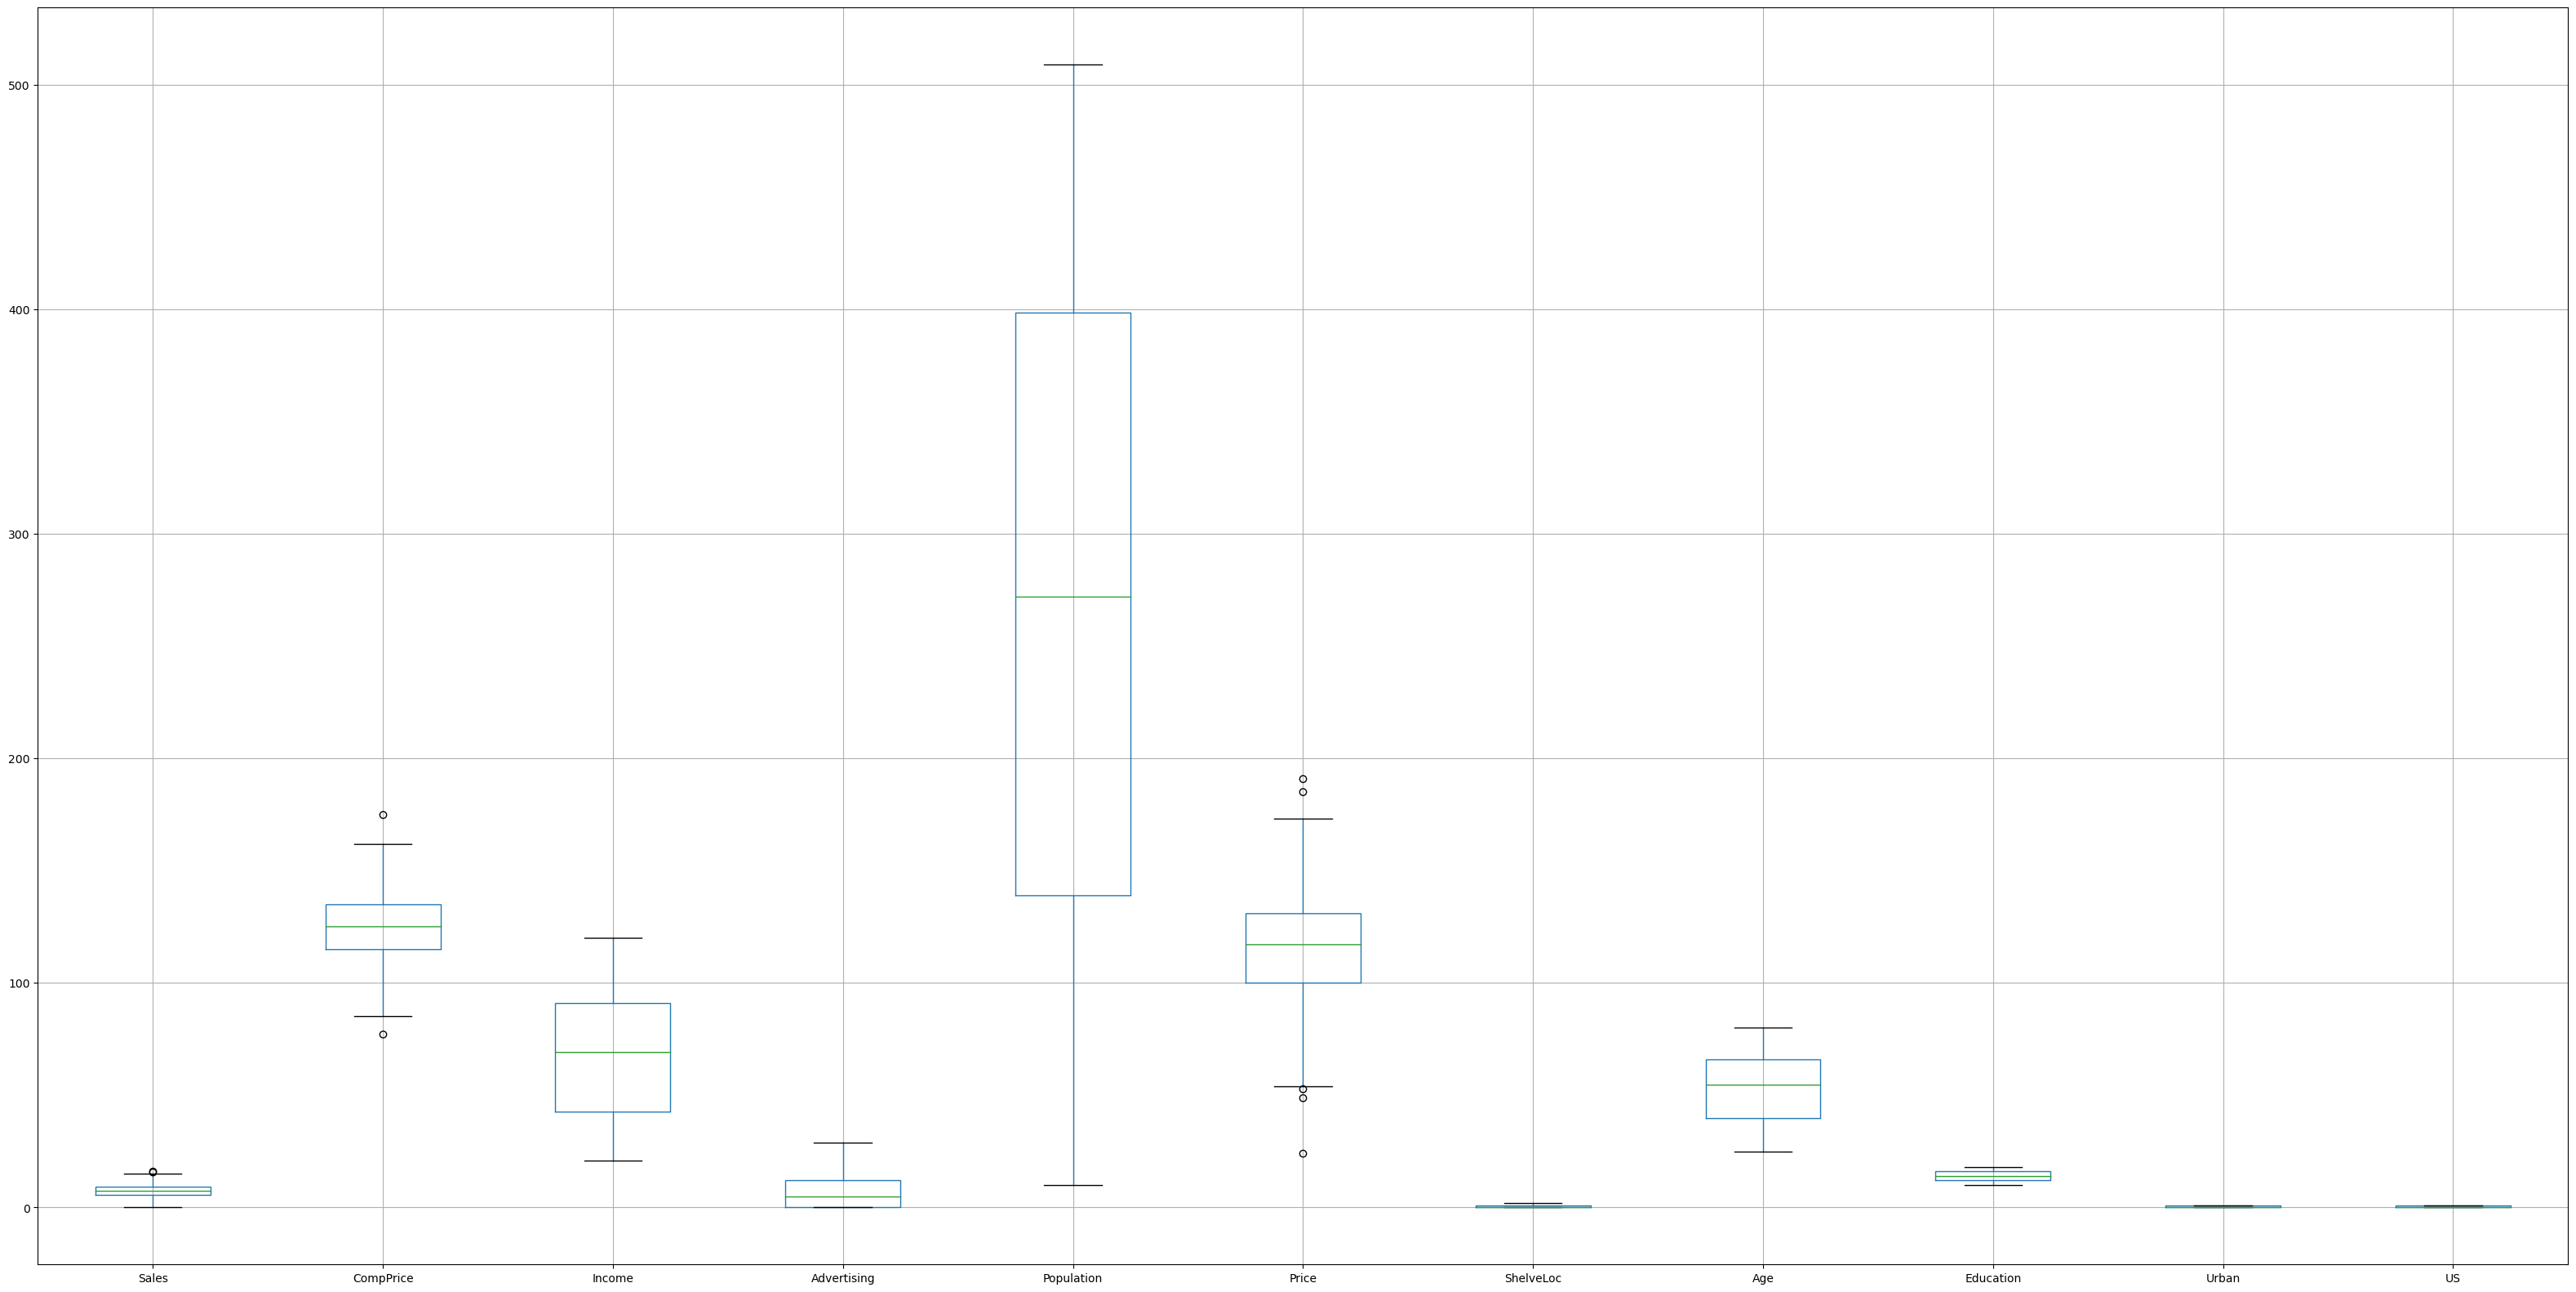

In [40]:
#Boxplot visualisation of dataset to Checking for outliers
df.boxplot(figsize=(40,20))
plt.show()

In [42]:
#Finding IQR
q3 = df['Price'].quantile(0.75)  
q1 = df['Price'].quantile(0.25)
#print(q3)
#print(q1)
IQR = q3 - q1
#print(IQR)
lower_limit = q1 - (IQR * 1.5)
print(lower_limit)
upper_limit = q3 + (IQR * 1.5)
print(upper_limit)

53.5
177.5


In [43]:
#replace any values in the Price column of the company_data dataset that are above a certain upper limit or below a certain lower limit with the respective limit value.
df['Price']=np.where(df['Price']>upper_limit,upper_limit,#condition checks if the value in the Price column is greater than a specified upper_limit.
    np.where(df['Price']<lower_limit,lower_limit,df['Price']))

In [44]:
#Finding IQR
q3 = df['CompPrice'].quantile(0.75)  
q1 = df['CompPrice'].quantile(0.25)
#print(q3)
#print(q1)
IQR = q3 - q1
#print(IQR)
lower_limit = q1 - (IQR * 1.5)
print(lower_limit)
upper_limit = q3 + (IQR * 1.5)
print(upper_limit)

85.0
165.0


In [45]:
df['CompPrice']=np.where(df['CompPrice']>upper_limit,upper_limit,
    np.where(df['CompPrice']<lower_limit,lower_limit,df['CompPrice']))

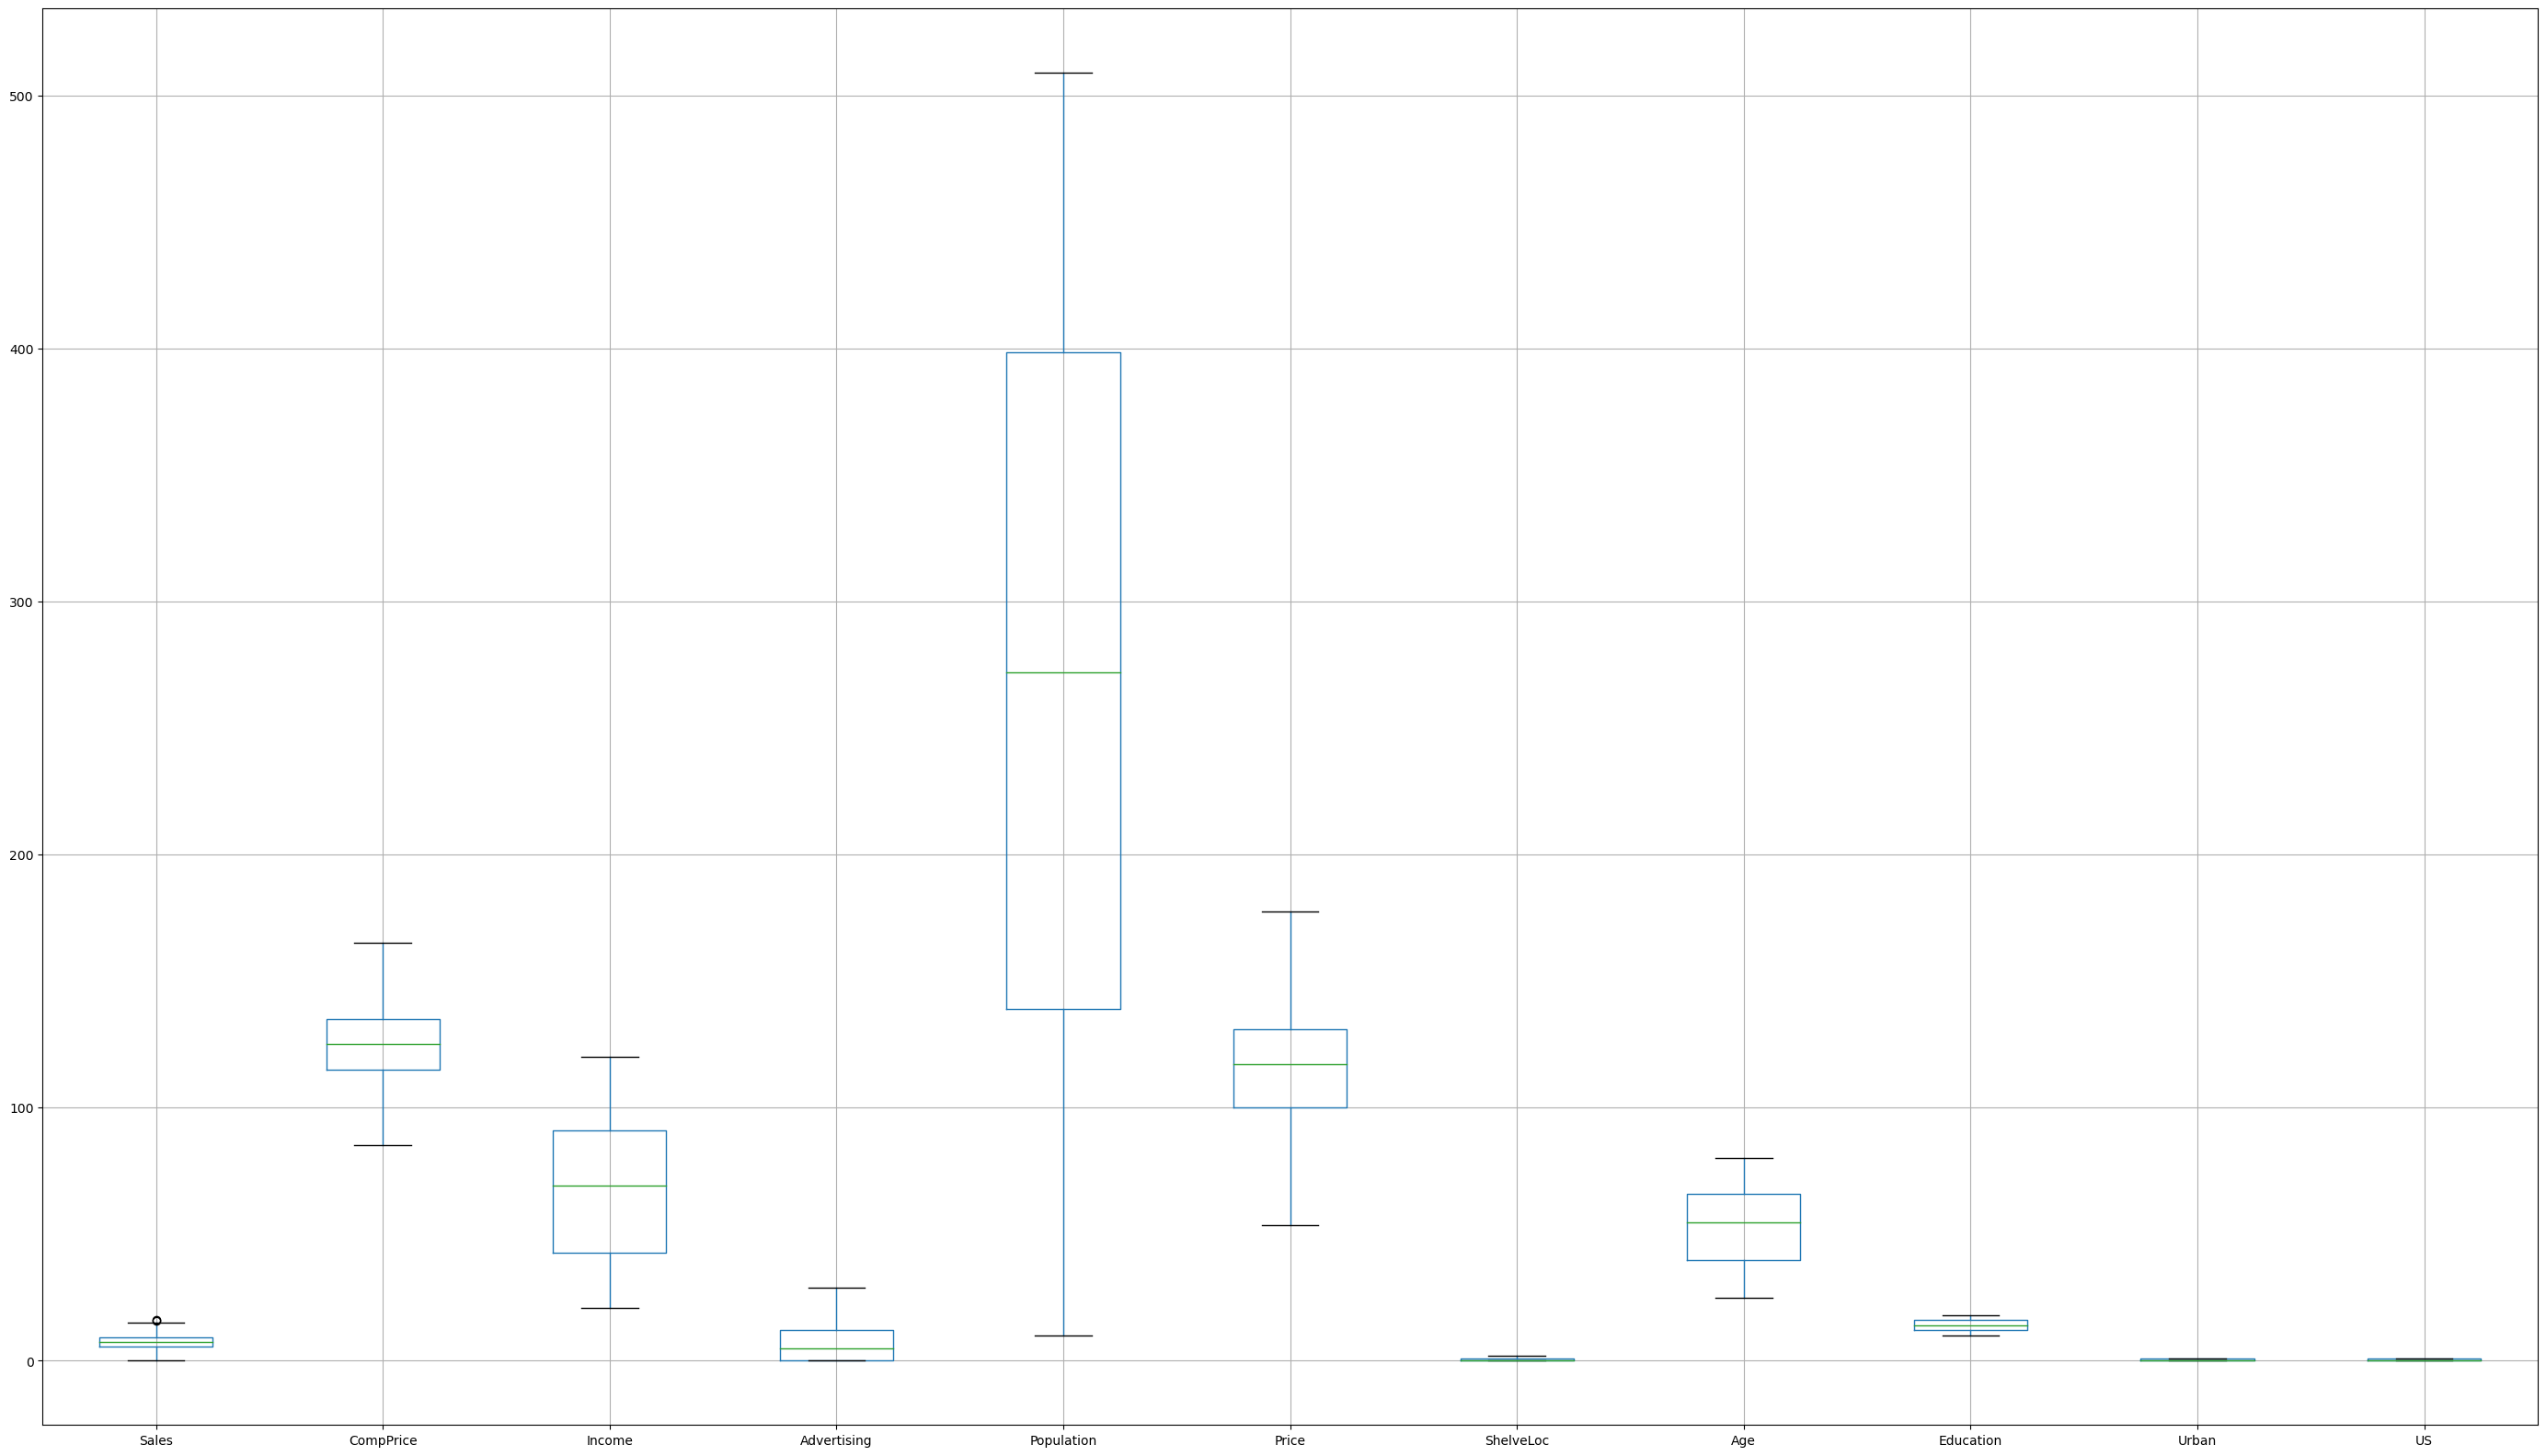

In [49]:
#boxplot after outlier treatment
df.boxplot(figsize=(35,20))
plt.show()

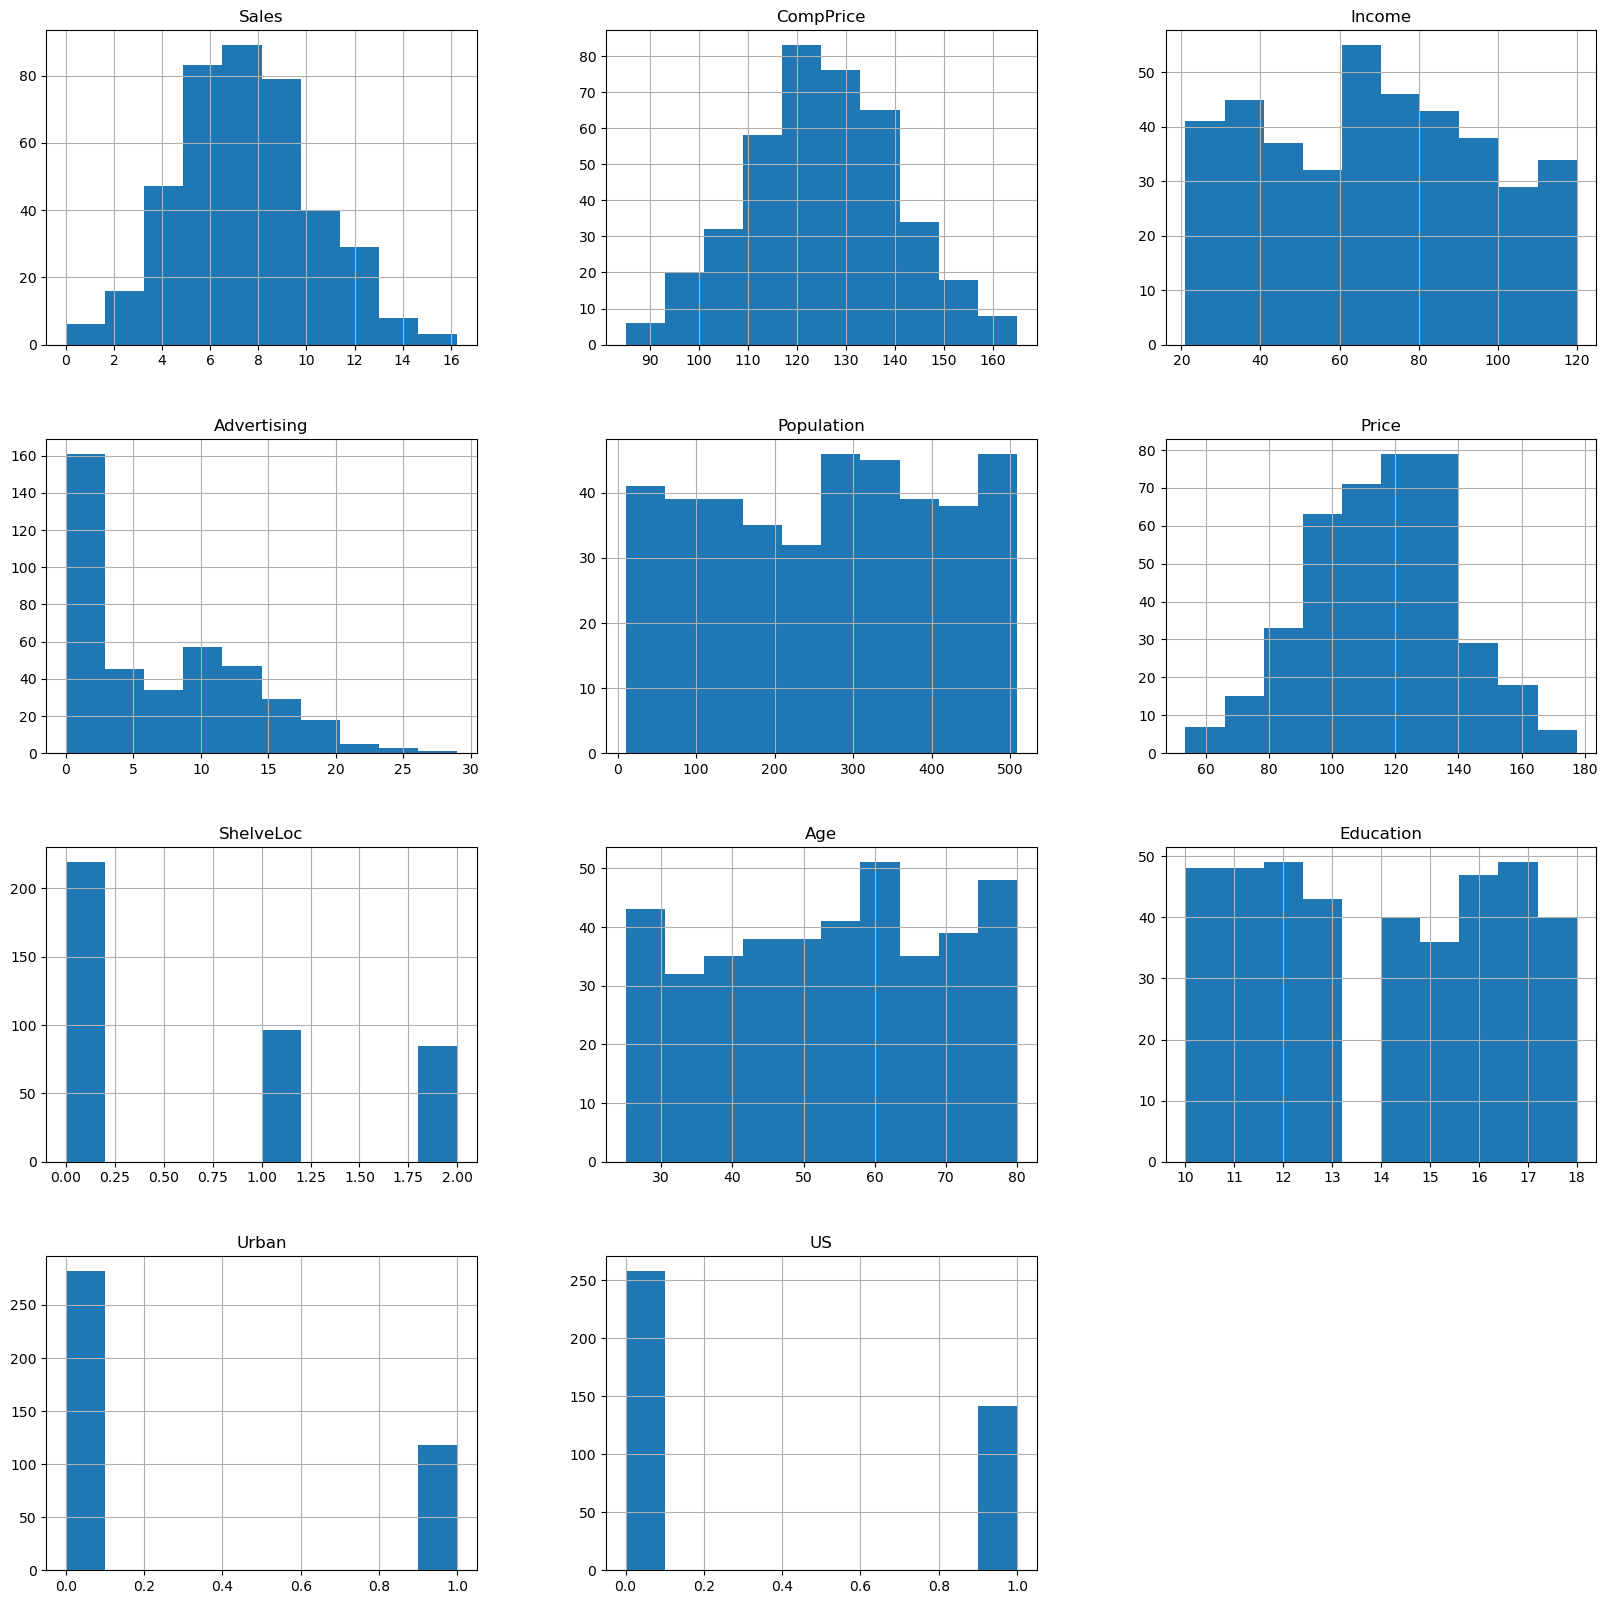

In [51]:
#histogram visualization of all the columns in the company_data dataset.
df.hist(figsize = (20,20))
plt.show()

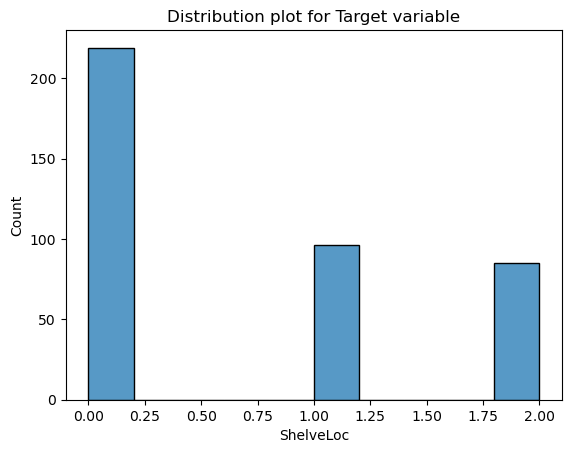

In [53]:
# histogram visualization of the ShelveLoc column, which is assumed to be the target variable in the company_data dataset.
sns.histplot(df['ShelveLoc'])
plt.title('Distribution plot for Target variable')
plt.show()

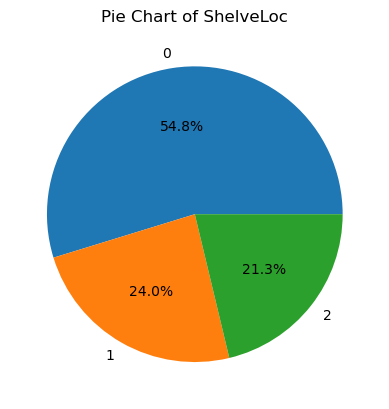

In [55]:
# Count the number of occurrences of each value in the 'ShelveLoc' column
value_counts = df['ShelveLoc'].value_counts()

# Create a pie chart of the value counts
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

# Add a title to the pie chart
plt.title('Pie Chart of ShelveLoc')

# Display the pie chart
plt.show()

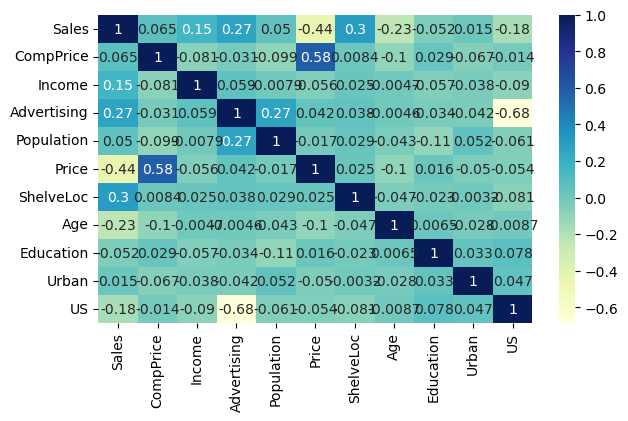

In [56]:
#heatmap visualization of the correlation between each pair of columns in the company_data dataset.
plt.figure(figsize = (7, 4))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
#display the heatmap
plt.show()

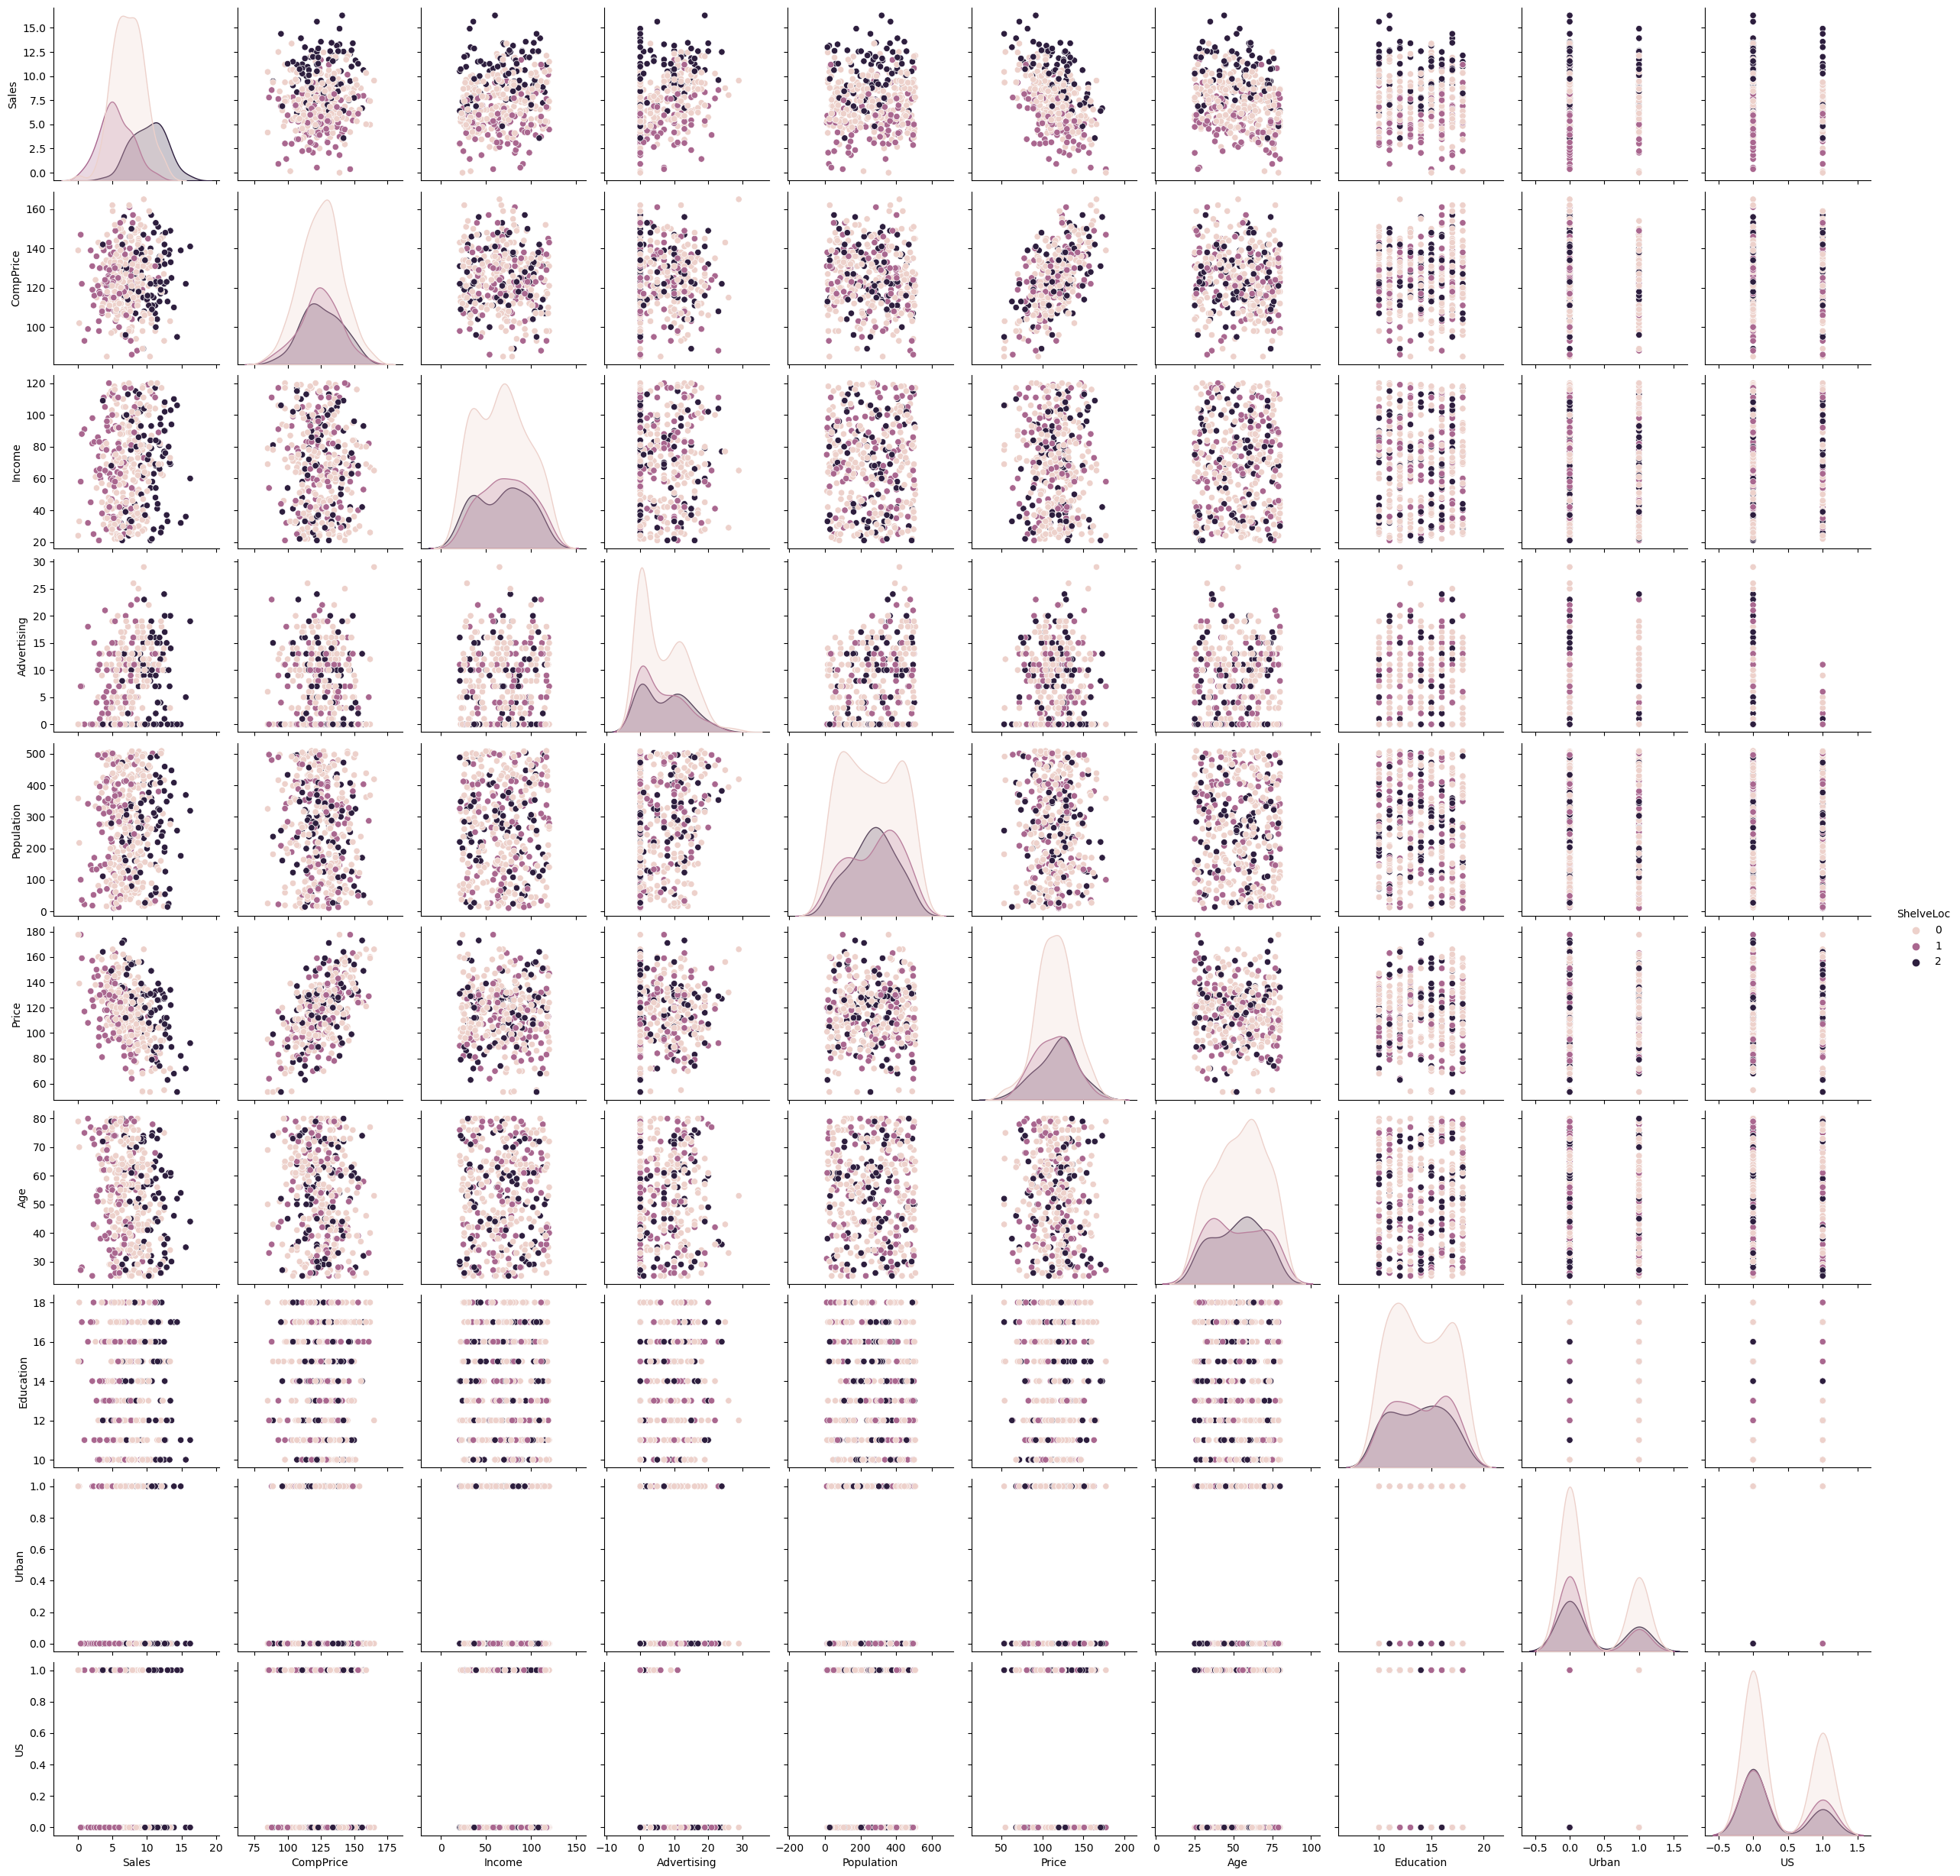

In [57]:
# pairplot visualization of the company_data dataset, where each pair of columns is plotted against each other in a scatterplot.
sns.pairplot(df, hue='ShelveLoc')
plt.show()